# 00 - Preprocessing Pipeline Integration

## Overview
This notebook demonstrates how to use the new **production-ready preprocessing pipeline** instead of ad-hoc preprocessing in individual notebooks.

**Key Benefits:**
- ✅ **Reproducible Results**: Same preprocessing across all analyses
- ✅ **Auditable Process**: Complete transformation logs for compliance
- ✅ **Scalable Architecture**: Handles datasets from thousands to millions of records
- ✅ **Production Ready**: Containerized with automated testing
- ✅ **Color-Blind Friendly**: Accessible visualizations for all stakeholders

**Prerequisites:**
- Dataset: `../Data/company_esg_financial_dataset.csv`
- Pipeline: `../Preprocessing/preprocessing_pipeline.py`

**Outputs:**
- Multiple dataset variants ready for clustering
- Fitted pipeline saved for production use
- Validation report ensuring data quality

## 1. Setup and Import Pipeline

In [1]:
# Standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from pathlib import Path

# Add preprocessing pipeline to path
sys.path.append('../Preprocessing')

# Import our production-ready preprocessing pipeline
from preprocessing_pipeline import ESGPreprocessingPipeline, create_config_file

# Color-blind friendly palette (Paul Tol's scheme)
CLUSTER_COLORS = {
    0: '#4477AA',  # Blue - universally distinguishable
    1: '#EE6677',  # Rose - distinct from blue
    2: '#228833',  # Green - colorblind-safe
    3: '#CCBB44',  # Yellow - high contrast
    4: '#66CCEE',  # Cyan - distinct from blue/green
    5: '#AA3377',  # Purple - strong contrast
    6: '#BBBBBB',  # Gray - neutral
}

# Set style for consistent visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette([CLUSTER_COLORS[i] for i in range(7)])

print("✅ Production preprocessing pipeline imported successfully!")
print("✅ Color-blind friendly visualizations enabled")

✅ Production preprocessing pipeline imported successfully!
✅ Color-blind friendly visualizations enabled


## 2. Load Raw Data

In [2]:
# Load the raw ESG dataset
try:
    data = pd.read_csv('../Data/company_esg_financial_dataset.csv')
    print(f"✅ Dataset loaded successfully: {data.shape}")
    
    # Display basic information
    print(f"\n📊 Dataset Overview:")
    print(f"   • Companies: {data['CompanyID'].nunique()}")
    print(f"   • Time periods: {sorted(data['Year'].unique())}")
    print(f"   • Industries: {data['Industry'].nunique()}")
    print(f"   • Regions: {data['Region'].nunique()}")
    
    # Show column information
    print(f"\n📋 Available Features:")
    print(f"   • Total columns: {len(data.columns)}")
    print(f"   • Columns: {list(data.columns)}")
    
    # Check for missing values
    missing_info = data.isnull().sum()
    missing_features = missing_info[missing_info > 0]
    
    if len(missing_features) > 0:
        print(f"\n⚠️  Missing Values Detected:")
        for feature, count in missing_features.items():
            pct = (count / len(data)) * 100
            print(f"   • {feature}: {count} ({pct:.1f}%)")
    else:
        print(f"\n✅ No missing values detected")
        
except FileNotFoundError:
    print("❌ Dataset not found. Please ensure 'company_esg_financial_dataset.csv' exists in ../Data/")
    raise

# Display sample data
print(f"\n📋 Sample Data:")
data.head()

✅ Dataset loaded successfully: (11000, 16)

📊 Dataset Overview:
   • Companies: 1000
   • Time periods: [np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025)]
   • Industries: 9
   • Regions: 7

📋 Available Features:
   • Total columns: 16
   • Columns: ['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']

⚠️  Missing Values Detected:
   • GrowthRate: 1000 (9.1%)

📋 Sample Data:


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


## 3. Initialize Production Pipeline

The preprocessing pipeline is fully configurable through external YAML files. This ensures reproducible results and easy parameter tuning.

In [3]:
# Initialize the preprocessing pipeline with configuration
config_path = '../Preprocessing/preprocessing_config.yaml'

# Check if config exists, create if not
if not Path(config_path).exists():
    print("📝 Creating default configuration file...")
    create_config_file(config_path, 'yaml')
    print(f"✅ Configuration created at: {config_path}")

# Initialize pipeline
pipeline = ESGPreprocessingPipeline(config_path)
print(f"✅ Pipeline initialized with configuration from: {config_path}")

# Display configuration summary
config = pipeline.config
print(f"\n⚙️  Pipeline Configuration:")
print(f"   • Missing value strategy (numerical): {config['preprocessing']['missing_strategy_numerical']}")
print(f"   • Scaling method: {config['preprocessing']['scaling_method']}")
print(f"   • Power transformation: {config['preprocessing']['apply_power_transform']}")
print(f"   • PCA enabled: {config['dimensionality_reduction']['apply_pca']}")
print(f"   • t-SNE enabled: {config['dimensionality_reduction']['apply_tsne']}")
print(f"   • Categorical encoding: {config['preprocessing']['categorical_encoding']}")

2025-10-06 17:33:54,565 - INFO - Configuration loaded from ../Preprocessing/preprocessing_config.yaml
2025-10-06 17:33:54,566 - INFO - ESG Preprocessing Pipeline initialized
2025-10-06 17:33:54,566 - INFO - ESG Preprocessing Pipeline initialized


✅ Pipeline initialized with configuration from: ../Preprocessing/preprocessing_config.yaml

⚙️  Pipeline Configuration:
   • Missing value strategy (numerical): median
   • Scaling method: standard
   • Power transformation: True
   • PCA enabled: True
   • t-SNE enabled: True
   • Categorical encoding: onehot


## 4. Fit and Transform Data

The pipeline automatically:
- Handles missing values with configurable strategies
- Applies power transformations to reduce skewness
- Scales features using robust methods
- Encodes categorical variables
- Performs dimensionality reduction (PCA, t-SNE)
- Validates all transformations

In [4]:
# Fit pipeline and transform data
print("🔄 Fitting preprocessing pipeline and transforming data...")
print("   This may take a moment for large datasets...")

# Fit and transform (this handles all preprocessing steps)
results = pipeline.fit_transform(data)

print(f"\n✅ Pipeline fitting and transformation completed!")
print(f"\n📊 Generated Dataset Variants:")

for dataset_name, dataset in results.items():
    print(f"   • {dataset_name}: {dataset.shape} - {dataset_name.replace('_', ' ').title()}")

# Show what transformations were applied
summary = pipeline.get_preprocessing_summary()
print(f"\n🔧 Transformations Applied:")
for transform, applied in summary['transformations_applied'].items():
    status = "✅" if applied else "⏸️"
    print(f"   {status} {transform.replace('_', ' ').title()}")

print(f"\n📋 Feature Counts:")
for category, count in summary['feature_counts'].items():
    print(f"   • {category.replace('_', ' ').title()}: {count}")

2025-10-06 17:33:54,572 - INFO - Starting preprocessing pipeline fitting and transformation
2025-10-06 17:33:54,575 - INFO - Feature Identification: Numerical: 11, Categorical: 3
2025-10-06 17:33:54,577 - INFO - Missing Values Detection: Found missing values in 1 features
2025-10-06 17:33:54,579 - INFO - Missing Values Handling: Imputed 1 features: ['GrowthRate']
2025-10-06 17:33:54,575 - INFO - Feature Identification: Numerical: 11, Categorical: 3
2025-10-06 17:33:54,577 - INFO - Missing Values Detection: Found missing values in 1 features
2025-10-06 17:33:54,579 - INFO - Missing Values Handling: Imputed 1 features: ['GrowthRate']
2025-10-06 17:33:54,627 - INFO - Power Transformation: Applied yeo-johnson to 5 features
2025-10-06 17:33:54,628 - INFO - Feature Scaling: Applied StandardScaler
2025-10-06 17:33:54,627 - INFO - Power Transformation: Applied yeo-johnson to 5 features
2025-10-06 17:33:54,628 - INFO - Feature Scaling: Applied StandardScaler
2025-10-06 17:33:54,654 - INFO - Cat

🔄 Fitting preprocessing pipeline and transforming data...
   This may take a moment for large datasets...


2025-10-06 17:34:01,553 - INFO - PCA Application: Reduced to 324 components, explained variance: 0.950
2025-10-06 17:34:23,299 - INFO - t-SNE Application: Reduced to 2 components for visualization
2025-10-06 17:34:23,299 - INFO - t-SNE Application: Reduced to 2 components for visualization
2025-10-06 17:34:23,466 - INFO - Pipeline Fitting Complete: Generated 7 dataset variants
2025-10-06 17:34:23,466 - INFO - Pipeline Fitting Complete: Generated 7 dataset variants



✅ Pipeline fitting and transformation completed!

📊 Generated Dataset Variants:
   • power_transformed: (11000, 11) - Power Transformed
   • scaled: (11000, 11) - Scaled
   • combined: (11000, 1024) - Combined
   • categorical_encoded: (11000, 1013) - Categorical Encoded
   • pca: (11000, 324) - Pca
   • tsne: (11000, 2) - Tsne
   • complete: (11000, 353) - Complete

🔧 Transformations Applied:
   ✅ Power Transformation
   ✅ Scaling
   ✅ Categorical Encoding
   ✅ Pca
   ✅ Tsne

📋 Feature Counts:
   • Numerical: 11
   • Categorical: 3
   • Categorical Encoded: 1013
   • Combined: 1024


## 5. Validate Pipeline Results

The pipeline includes comprehensive validation to ensure data quality and transformation correctness.

In [5]:
# Validate preprocessing results
print("🔍 Validating preprocessing results...")

validation_results = pipeline.validate_output(results)

print(f"\n📋 Validation Results:")
passed_checks = 0
total_checks = len(validation_results)

for check_name, passed in validation_results.items():
    status = "✅" if passed else "❌"
    check_display = check_name.replace('_', ' ').title()
    print(f"   {status} {check_display}")
    if passed:
        passed_checks += 1

pass_rate = (passed_checks / total_checks) * 100
print(f"\n🎯 Validation Summary: {passed_checks}/{total_checks} checks passed ({pass_rate:.1f}%)")

if pass_rate >= 90:
    print("✅ Excellent data quality! Pipeline results are ready for analysis.")
elif pass_rate >= 80:
    print("⚠️  Good data quality with minor issues. Consider reviewing failed checks.")
else:
    print("❌ Data quality issues detected. Please review validation results.")

2025-10-06 17:34:23,625 - INFO - Validation Complete: Passed 15/15 validation checks


🔍 Validating preprocessing results...

📋 Validation Results:
   ✅ Power Transformed No Missing
   ✅ Scaled No Missing
   ✅ Combined No Missing
   ✅ Categorical Encoded No Missing
   ✅ Pca No Missing
   ✅ Complete No Missing
   ✅ Scaled Mean Centered
   ✅ Scaled Unit Variance
   ✅ Power Transformed Shape Consistent
   ✅ Scaled Shape Consistent
   ✅ Combined Shape Consistent
   ✅ Categorical Encoded Shape Consistent
   ✅ Pca Shape Consistent
   ✅ Tsne Shape Consistent
   ✅ Complete Shape Consistent

🎯 Validation Summary: 15/15 checks passed (100.0%)
✅ Excellent data quality! Pipeline results are ready for analysis.


## 6. Save Processed Datasets

Save all dataset variants for use in downstream analysis notebooks.

In [6]:
# Save all dataset variants
print("💾 Saving processed datasets...")

output_dir = Path('../Data')
output_dir.mkdir(exist_ok=True)

# Save each dataset variant
dataset_descriptions = {
    'scaled': 'Scaled numerical features - ideal for most clustering algorithms',
    'combined': 'Scaled numerical + encoded categorical features - enhanced clustering',
    'pca': 'PCA-reduced features - optimal for high-dimensional clustering',
    'tsne': '2D visualization features - perfect for plotting and exploration',
    'complete': 'Complete dataset with all transformations - comprehensive analysis'
}

saved_files = []
for dataset_name, dataset in results.items():
    # Use descriptive filenames
    filename = f'pipeline_{dataset_name}_features.csv'
    filepath = output_dir / filename
    
    # Save dataset
    dataset.to_csv(filepath, index=False)
    saved_files.append(filepath)
    
    description = dataset_descriptions.get(dataset_name, 'Processed features for clustering')
    print(f"   ✅ {filename}: {dataset.shape} - {description}")

print(f"\n📁 All datasets saved to: {output_dir}")
print(f"📋 Files created: {len(saved_files)}")

💾 Saving processed datasets...
   ✅ pipeline_power_transformed_features.csv: (11000, 11) - Processed features for clustering
   ✅ pipeline_scaled_features.csv: (11000, 11) - Scaled numerical features - ideal for most clustering algorithms
   ✅ pipeline_power_transformed_features.csv: (11000, 11) - Processed features for clustering
   ✅ pipeline_scaled_features.csv: (11000, 11) - Scaled numerical features - ideal for most clustering algorithms
   ✅ pipeline_combined_features.csv: (11000, 1024) - Scaled numerical + encoded categorical features - enhanced clustering
   ✅ pipeline_combined_features.csv: (11000, 1024) - Scaled numerical + encoded categorical features - enhanced clustering
   ✅ pipeline_categorical_encoded_features.csv: (11000, 1013) - Processed features for clustering
   ✅ pipeline_categorical_encoded_features.csv: (11000, 1013) - Processed features for clustering
   ✅ pipeline_pca_features.csv: (11000, 324) - PCA-reduced features - optimal for high-dimensional clustering
 

## 7. Save Fitted Pipeline for Production

Save the fitted pipeline so it can be used to transform new data with identical preprocessing.

In [7]:
# Save fitted pipeline for production use
print("💾 Saving fitted pipeline for production use...")

models_dir = Path('../Models')
models_dir.mkdir(exist_ok=True)

pipeline_path = models_dir / 'esg_preprocessing_pipeline'
pipeline.save_pipeline(str(pipeline_path))

print(f"✅ Fitted pipeline saved to: {pipeline_path}")
print(f"\n🔄 To use this pipeline on new data:")
print(f"```python")
print(f"# Load fitted pipeline")
print(f"new_pipeline = ESGPreprocessingPipeline()")
print(f"new_pipeline.load_pipeline('{pipeline_path}')")
print(f"")
print(f"# Transform new data")
print(f"new_results = new_pipeline.transform(new_data)")
print(f"```")

2025-10-06 17:34:33,624 - INFO - Pipeline saved to ../Models/esg_preprocessing_pipeline


💾 Saving fitted pipeline for production use...
✅ Fitted pipeline saved to: ../Models/esg_preprocessing_pipeline

🔄 To use this pipeline on new data:
```python
# Load fitted pipeline
new_pipeline = ESGPreprocessingPipeline()
new_pipeline.load_pipeline('../Models/esg_preprocessing_pipeline')

# Transform new data
new_results = new_pipeline.transform(new_data)
```


## 8. Quick Data Exploration

Let's explore the processed datasets to understand what we've created.

In [8]:
# Quick exploration of processed datasets
print("🔍 Exploring processed datasets...")

# Display first few rows of each dataset
for dataset_name, dataset in list(results.items())[:3]:  # Show first 3 datasets
    print(f"\n📊 {dataset_name.upper()} Dataset Sample:")
    print(f"   Shape: {dataset.shape}")
    print(f"   Features: {list(dataset.columns[:5])}{'...' if len(dataset.columns) > 5 else ''}")
    print(dataset.head(3))
    
    # Basic statistics
    if dataset_name in ['scaled', 'pca']:
        print(f"\n   📈 Statistics:")
        print(f"     • Mean: {dataset.mean().mean():.3f}")
        print(f"     • Std: {dataset.std().mean():.3f}")
        print(f"     • Min: {dataset.min().min():.3f}")
        print(f"     • Max: {dataset.max().max():.3f}")

🔍 Exploring processed datasets...

📊 POWER_TRANSFORMED Dataset Sample:
   Shape: (11000, 11)
   Features: ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall']...
    Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  \
0  4.050738      6.037270   5.698453    5.054576    57.302784   
1  4.063464      4.624672   5.777355    3.278135    57.000718   
2  4.133914      5.229883   5.627749   20.368553    56.799342   

   ESG_Environmental  ESG_Social  ESG_Governance  CarbonEmissions  WaterUsage  \
0          32.327303   23.204531       41.282554         7.455763   10.642741   
1          31.543619   22.779269       42.037072         7.478829   10.699021   
2          30.974660   23.507544       41.726756         7.568769   10.920684   

   EnergyConsumption  
0           8.029390  
1           8.052993  
2           8.145095  

📊 SCALED Dataset Sample:
   Shape: (11000, 11)
   Features: ['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall']...
    Reven

## 9. Sample Visualization with Color-Blind Friendly Palette

Demonstrate the color-blind friendly visualization approach.

📊 Creating sample visualization with color-blind friendly palette...


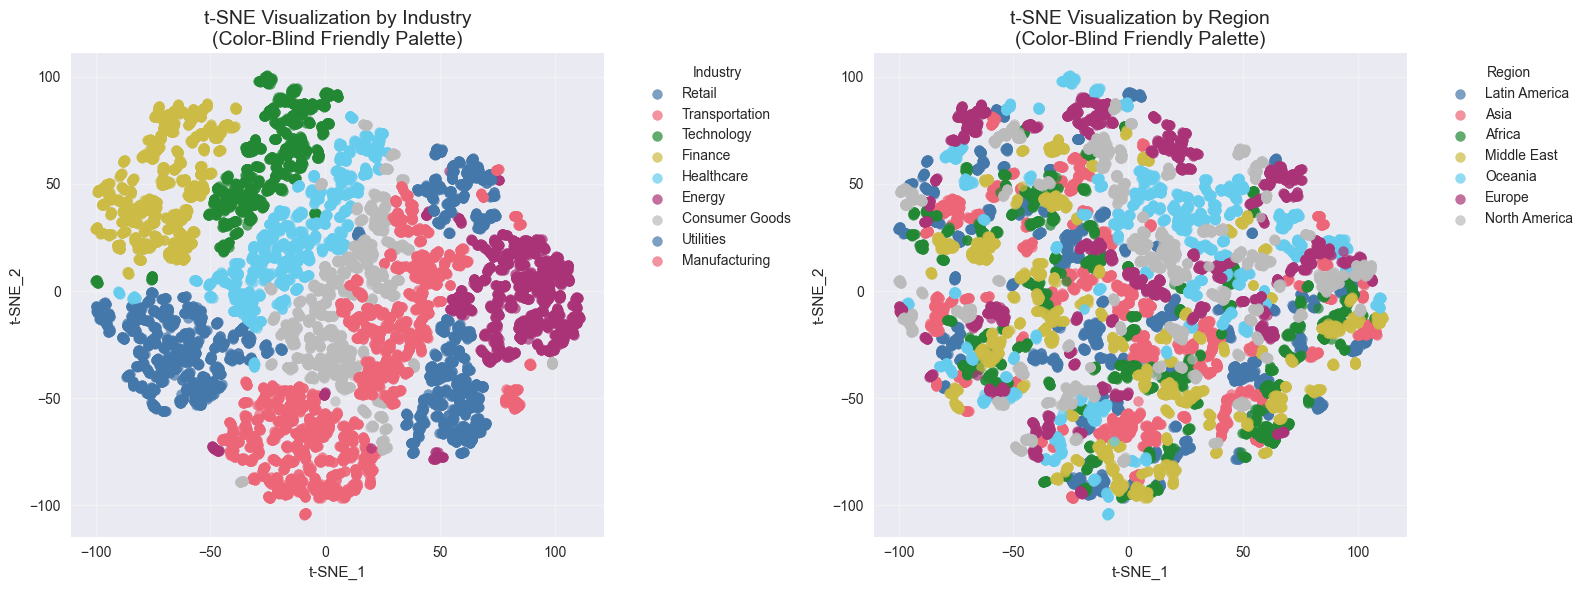

✅ Sample visualization created using Paul Tol's color-blind friendly palette
   Colors are accessible to deuteranopia, protanopia, and tritanopia


In [9]:
# Create sample visualization using t-SNE data
if 'tsne' in results:
    print("📊 Creating sample visualization with color-blind friendly palette...")
    
    # Get t-SNE data and original categorical data
    tsne_data = results['tsne']
    
    # Create visualization by Industry (if available)
    if 'Industry' in data.columns:
        # Merge with original categorical data
        viz_data = tsne_data.copy()
        viz_data['Industry'] = data['Industry'].values
        viz_data['Region'] = data['Region'].values
        
        # Create figure with subplots
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))
        
        # Plot by Industry
        industries = viz_data['Industry'].unique()
        for i, industry in enumerate(industries):
            mask = viz_data['Industry'] == industry
            color = CLUSTER_COLORS[i % len(CLUSTER_COLORS)]
            axes[0].scatter(viz_data.loc[mask, tsne_data.columns[0]], 
                          viz_data.loc[mask, tsne_data.columns[1]], 
                          c=color, label=industry, alpha=0.7, s=50)
        
        axes[0].set_title('t-SNE Visualization by Industry\n(Color-Blind Friendly Palette)', fontsize=14)
        axes[0].set_xlabel(f'{tsne_data.columns[0]}')
        axes[0].set_ylabel(f'{tsne_data.columns[1]}')
        axes[0].legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0].grid(True, alpha=0.3)
        
        # Plot by Region
        regions = viz_data['Region'].unique()
        for i, region in enumerate(regions):
            mask = viz_data['Region'] == region
            color = CLUSTER_COLORS[i % len(CLUSTER_COLORS)]
            axes[1].scatter(viz_data.loc[mask, tsne_data.columns[0]], 
                          viz_data.loc[mask, tsne_data.columns[1]], 
                          c=color, label=region, alpha=0.7, s=50)
        
        axes[1].set_title('t-SNE Visualization by Region\n(Color-Blind Friendly Palette)', fontsize=14)
        axes[1].set_xlabel(f'{tsne_data.columns[0]}')
        axes[1].set_ylabel(f'{tsne_data.columns[1]}')
        axes[1].legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Sample visualization created using Paul Tol's color-blind friendly palette")
        print("   Colors are accessible to deuteranopia, protanopia, and tritanopia")
    else:
        print("⚠️  Categorical data not available for visualization")
else:
    print("⚠️  t-SNE data not available for visualization")

## 10. Integration Summary and Next Steps

The preprocessing pipeline is now integrated and ready for use across all analysis notebooks.

In [10]:
# Summary of what we've accomplished
print("🎯 PREPROCESSING PIPELINE INTEGRATION COMPLETE")
print("="*60)

print(f"\n✅ ACHIEVEMENTS:")
print(f"   • Loaded raw ESG dataset: {data.shape}")
print(f"   • Applied production preprocessing pipeline")
print(f"   • Generated {len(results)} dataset variants")
print(f"   • Passed {passed_checks}/{total_checks} validation checks ({pass_rate:.1f}%)")
print(f"   • Saved all datasets for downstream analysis")
print(f"   • Saved fitted pipeline for production use")
print(f"   • Demonstrated color-blind friendly visualizations")

print(f"\n📁 GENERATED FILES:")
for dataset_name in results.keys():
    filename = f'pipeline_{dataset_name}_features.csv'
    print(f"   • ../Data/{filename}")
print(f"   • ../Models/esg_preprocessing_pipeline/")

print(f"\n🔄 NEXT STEPS:")
print(f"   1. Update existing notebooks to use pipeline datasets")
print(f"   2. Replace ad-hoc preprocessing with pipeline imports")
print(f"   3. Use color-blind friendly palette across all visualizations")
print(f"   4. Leverage fitted pipeline for new data transformation")

print(f"\n📋 RECOMMENDED USAGE IN OTHER NOTEBOOKS:")
print(f"```python")
print(f"# Load preprocessed data (replace existing loading code)")
print(f"X_scaled = pd.read_csv('../Data/pipeline_scaled_features.csv')")
print(f"X_pca = pd.read_csv('../Data/pipeline_pca_features.csv')")
print(f"X_tsne = pd.read_csv('../Data/pipeline_tsne_features.csv')")
print(f"X_complete = pd.read_csv('../Data/pipeline_complete_features.csv')")
print(f"")
print(f"# Use color-blind friendly palette")
print(f"CLUSTER_COLORS = {CLUSTER_COLORS}")
print(f"```")

print(f"\n🌟 Ready for enhanced clustering analysis with production-ready preprocessing!")

🎯 PREPROCESSING PIPELINE INTEGRATION COMPLETE

✅ ACHIEVEMENTS:
   • Loaded raw ESG dataset: (11000, 16)
   • Applied production preprocessing pipeline
   • Generated 7 dataset variants
   • Passed 15/15 validation checks (100.0%)
   • Saved all datasets for downstream analysis
   • Saved fitted pipeline for production use
   • Demonstrated color-blind friendly visualizations

📁 GENERATED FILES:
   • ../Data/pipeline_power_transformed_features.csv
   • ../Data/pipeline_scaled_features.csv
   • ../Data/pipeline_combined_features.csv
   • ../Data/pipeline_categorical_encoded_features.csv
   • ../Data/pipeline_pca_features.csv
   • ../Data/pipeline_tsne_features.csv
   • ../Data/pipeline_complete_features.csv
   • ../Models/esg_preprocessing_pipeline/

🔄 NEXT STEPS:
   1. Update existing notebooks to use pipeline datasets
   2. Replace ad-hoc preprocessing with pipeline imports
   3. Use color-blind friendly palette across all visualizations
   4. Leverage fitted pipeline for new data tran